# Timeseries

This notebook shows how to use the timeseries diagnostic. Here we focus on the `Timeseries` for the single model evaluation and the `PlotTimeseries` for the multi model plots.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.timeseries import Timeseries

We set the `Timeseries` for a model and ERA5, with two different class instances.

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [4]:
ts_dataset = Timeseries(**dataset_dict, **common_dict)

In [5]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [6]:
ts_dataset.run(**run_dict)

2025-03-27 10:49:37 :: TimeSeries :: INFO     -> Running Timeseries for 2t
2025-03-27 10:49:37 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-03-27 10:49:38 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-03-27 10:49:38 :: Reader :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-03-27 10:49:38 :: Reader :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-03-27 10:49:38 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-03-27 10:49:38 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-03-27 10:49:38 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-03-27 10:49:57 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-03-27 10:49:57 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-03-27 10:49:57 :: Regridder :: INFO     -> Grid name: lon-lat
2025-03-27 10:49

In [7]:
ts_obs = Timeseries(**obs_dict, **common_dict)
ts_obs.run(**run_dict, std=True)

2025-03-27 10:49:59 :: TimeSeries :: INFO     -> Running Timeseries for 2t
2025-03-27 10:49:59 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!
2025-03-27 10:50:00 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-03-27 10:50:00 :: Reader :: INFO     -> Fix names in metadata is ERA5-destine-v1
2025-03-27 10:50:00 :: Reader :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2025-03-27 10:50:00 :: Reader :: INFO     -> Grid metadata is era5-r025s
2025-03-27 10:50:00 :: Regridder :: INFO     -> Grid name: era5-r025s
2025-03-27 10:50:00 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_era5-r025s.nc.
2025-03-27 10:50:00 :: Reader :: INFO     -> Retrieving variables: ['2t']
2025-03-27 10:50:00 :: Reader :: INFO     -> Variables to be fixed: {'2t': {'source': [167, 228004, '2t', 'mean2t', 'avg_2t', 'T2M', 'tas'], 'grib': 167}}
2025-03-27 10:50:00 :: Reader :: INFO     

In [8]:
from aqua.diagnostics.timeseries import PlotTimeseries

In [9]:
plot_dict = {'monthly_data': ts_dataset.monthly,
             'annual_data': ts_dataset.annual,
             'ref_monthly_data': ts_obs.monthly,
             'ref_annual_data': ts_obs.annual,
             'std_monthly_data': ts_obs.std_monthly,
             'std_annual_data': ts_obs.std_annual,
             'loglevel': 'INFO'}

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='time', ylabel='2 metre temperature [degC]'>)

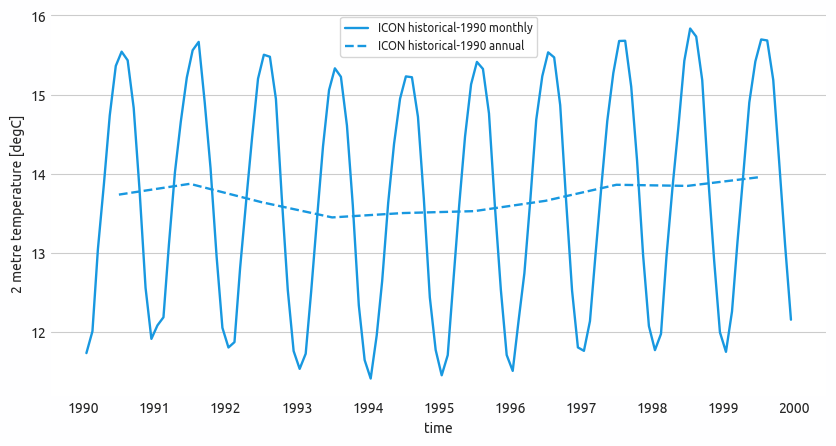

In [ ]:
plot = PlotTimeseries(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
fig, _ = plot.plot_timeseries(data_labels=data_labels, ref_label=ref_labels)
plot.save_plot(fig=fig, desc=desc)

In [9]:
PlotTimeseries?

Init signature:
PlotTimeseries(
    hourly_data=None,
    daily_data=None,
    monthly_data=None,
    annual_data=None,
    ref_hourly_data=None,
    ref_daily_data=None,
    ref_monthly_data=None,
    ref_annual_data=None,
    std_hourly_data=None,
    std_daily_data=None,
    std_monthly_data=None,
    std_annual_data=None,
    loglevel: str = 'WARNING',
)
Docstring:      <no docstring>
Init docstring:
Initialize the PlotTimeseries class.
This class is used to plot time series data previously processed
by the Timeseries class.

Any subset of frequency can be provided, however the order and length
of the list of data arrays must be the same for each frequency.

Args:
    hourly_data (list): List of hourly data arrays.
    daily_data (list): List of daily data arrays.
    monthly_data (list): List of monthly data arrays.
    annual_data (list): List of annual data arrays.
    ref_hourly_data (list): List of reference hourly data arrays.
    ref_daily_data (list): List of reference dail